### Import libraries

In [3]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
import warnings
warnings.filterwarnings('ignore')


## Importer les données de Pjmax corespondant à  station Hennaya

In [292]:
# Load precipitation data
Hennaya_obs = pd.read_csv('C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/observed/160516 M lala Hennaia.csv') 

# Load persian_cdr data
Hennaya_PERSIAN = pd.read_csv('C:/Users/Mahdi-ZIANE/OneDrive/Persian_cdr_Pjmax/M LILIA HENNAIA_annual_max.csv') 

In [37]:
# Dossier ou se trouvent les fichiers ayant Pjmax des Modéles CMIP6
cmip6 = ('C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/Pjmax_from_CMIP6_ClimModels/*.csv')  

In [49]:
# Get list of all CSV files in the specified folder 
csv_files = glob.glob('C:/Users/Mahdi-ZIANE/OneDrive/pluie_obs/processed_Precip_Record/from_Models/Pjmax_from_CMIP6_ClimModels/*.csv') 

# Create empty dictionary to store dataframes
dataframes = {}  

# Loop through each CSV file
for f in csv_files:

  # Use os.path.basename to get just file name, not full path
  filename = os.path.basename(f)  

  # Read CSV file into a Pandas dataframe
  df = pd.read_csv(f)   

  # Add dataframe to dictionary with filename as key
  dataframes[filename] = df

# Print keys of dictionary to see all filenames  
print(dataframes.keys())

dict_keys(['all_data_CanESM5.csv', 'all_data_CNRM_ESM2_1.csv', 'all_data_GFDL_ESM4.csv', 'all_data_IPSL_CM6A_LR.csv', 'all_data_MIROC6.csv', 'all_data_MPI_ESM1_2_HR.csv'])


In [159]:
# comment accéder aux  Pjmax pour la station avec l'année.
Hennaya_Can= dataframes['all_data_CanESM5.csv'][['time','Pjmax_M LILIA HENNAIA']]
Hennaya_Can.head(3)

,time,Pjmax_M LILIA HENNAIA
0,1950-12-31,17.232189
1,1951-12-31,15.104480
2,1952-12-31,11.854207


In [160]:
#make the time column a datetime object to set the year as index for the dataframe
Hennaya_Can['time'] = pd.to_datetime(Hennaya_Can['time'])

In [161]:
# Convert time column to datetime
Hennaya_Can['time'] = pd.to_datetime(Hennaya_Can['time']) 

# Extract year 
Hennaya_Can['year'] = Hennaya_Can['time'].dt.year

# Drop old time column
Hennaya_Can = Hennaya_Can.drop(columns=['time']) 

Hennaya_Can = Hennaya_Can.set_index('year')

Hennaya_Can.head(3)


,Pjmax_M LILIA HENNAIA
year,
1950,17.232189
1951,15.104480
1952,11.854207


In [256]:

#Renoommer precip en 'Pjmax_obs'
Hennaya_Can.rename(columns={'Pjmax_M LILIA HENNAIA': 'Pjmax_CanESM5'}, inplace=True)

Hennaya_Can.head(3)

,Pjmax_CanESM5
year,
1950,17.232189
1951,15.104480
1952,11.854207


### Hennaya Observed data

In [293]:
Hennaya_obs.set_index('year', inplace=True)
Hennaya_obs.rename(columns={'annuel': 'Pjmax_obs'}, inplace=True)


In [294]:
Hennaya_obs.drop('Pjmax', axis=1, inplace=True)
Hennaya_obs.head()

,Pjmax_obs
year,
1973,NaN
1974,66.0
1975,35.6
1976,27.8
1977,56.0


### PERSIAN DATA

In [295]:
Hennaya_PERSIAN = Hennaya_PERSIAN.set_index('datetime')
Hennaya_PERSIAN.rename_axis('year', inplace=True)

#Renoommer precip en 'Pjmax_PERSIAN'
Hennaya_PERSIAN.rename(columns={'precip': 'Pjmax_PERSIAN'}, inplace=True)

Hennaya_PERSIAN.head(3)

,Pjmax_PERSIAN
year,
1983,12.72
1984,12.92
1985,11.27


## Traitememnt et exploration de données

In [220]:
# Valeurs manquantes dans Pjmax Obserbées dans Hennaya

missing_values_count = Hennaya_obs.isnull().sum().sum()
print("Valeurs manquantes dans la serie Pjmax_Observées de Hennaya = ",missing_values_count)


Valeurs manquantes dans la serie Pjmax_Observées de Hennaya =  7


### Statistiques de base des series Pjmax

In [296]:
print(" Stats serie Pjmax Observées Hennaya:")
Hennaya_obs.describe()

 Stats serie Pjmax Observées Hennaya:


,Pjmax_obs
count,36.000000
mean,48.713889
std,23.828952
min,18.000000
25%,31.075000
50%,42.000000
75%,64.500000
max,129.000000


In [297]:
print(" Stats serie Pjmax PERSIAN à Hennaya:")
Hennaya_PERSIAN.describe()

 Stats serie Pjmax PERSIAN à Hennaya:


,Pjmax_PERSIAN
count,41.000000
mean,21.539606
std,10.111229
min,8.709146
25%,14.740000
50%,19.350000
75%,26.000000
max,56.020000


In [298]:
print(" Stats serie Pjmax CanESM5 à Hennaya:")
Hennaya_Can.describe()

 Stats serie Pjmax CanESM5 à Hennaya:


,Pjmax_CanESM5
count,65.000000
mean,18.645468
std,7.778352
min,6.374943
25%,13.551702
50%,17.599793
75%,21.725961
max,51.249858


In [303]:
Hennaya_Can.to_csv('Hennaya_Can.csv',index = True)
Hennaya_obs.to_csv('Hennaya_obs.csv',index = True)
Hennaya_PERSIAN.to_csv('Hennaya_PERSIAN.csv',index = True)

### Working with Hennaya data from the 3 saurces ( incl the CMIP6 Climate Models precip data)

In [4]:

Hennaya_data = pd.read_csv('C:/Users/Mahdi-ZIANE\OneDrive\Pjmax_Hennaya_all_sources.csv', index_col='year')
Hennaya_data.head()

,Pjmax_CanESM5,Pjmax_CNRM_ESM2_1,Pjmax_IPSL_CM6A_LR,Pjmax_GFDL_ESM4,Pjmax_MPI_ESM1_2_HR,Pjmax_MIROC6,Pjmax_obs,Pjmax_PERSIAN
year,,,,,,,,
1950,17.23,33.12,17.30,33.12,29.10,25.73,NaN,NaN
1951,15.10,42.46,23.44,42.46,32.00,21.34,NaN,NaN
1952,11.85,31.41,20.33,31.41,20.53,13.33,NaN,NaN
1953,27.43,38.62,8.75,38.62,23.85,23.92,NaN,NaN
1954,11.93,25.41,13.33,25.41,22.20,9.81,NaN,NaN


# Description of the precipitation data in the file Pjmax_Hennaya_all_sources.csv

- The file is a CSV with columns for 'year' and Pjmax values from different climate models and observational datasets.

- There are 8 columns:

  - `'year'` - ranges from 1950 to 2023

  - `'Pjmax_CanESM5'` - model data

  - `'Pjmax_CNRM_ESM2_1'` - model data

  - `'Pjmax_IPSL_CM6A_LR'` - model data

  - `'Pjmax_GFDL_ESM4'` - model data

  - `'Pjmax_MPI_ESM1_2_HR'` - model data

  - `'Pjmax_MIROC6'` - model data

  - `'Pjmax_obs'` - observational data

  - `'Pjmax_PERSIAN'` - observational/reanalysis data

- The data covers annual maximum daily precipitation (Pjmax in mm) for each model and observation at a single location.

- There are some missing years, especially in the observational data. The model data is more complete.

- The time period covered is 1950-2023, though observational data starts later around 1973.

- The data appears to be tidy with one column for the variable (Pjmax), and one column identifying the source model/dataset.

This precipitation dataset can be used to compare max daily precipitation across different climate models and observations. The data could be analyzed to evaluate model performance and determine which models best match the observations.

In [5]:
# Stats about data
Hennaya_data.describe()

,Pjmax_CanESM5,Pjmax_CNRM_ESM2_1,Pjmax_IPSL_CM6A_LR,Pjmax_GFDL_ESM4,Pjmax_MPI_ESM1_2_HR,Pjmax_MIROC6,Pjmax_obs,Pjmax_PERSIAN
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,36.000000,41.000000
mean,18.645692,35.341077,19.616615,35.341077,32.327538,22.937385,48.713889,21.539512
std,7.778193,9.028282,9.868333,9.028282,11.374998,10.013405,23.828952,10.111104
min,6.370000,19.210000,7.880000,19.210000,15.680000,9.720000,18.000000,8.710000
25%,13.550000,29.230000,13.330000,29.230000,23.950000,16.450000,31.075000,14.740000
50%,17.600000,36.120000,17.790000,36.120000,30.250000,21.340000,42.000000,19.350000
75%,21.730000,41.040000,22.820000,41.040000,36.900000,26.330000,64.500000,26.000000
max,51.250000,71.840000,61.690000,71.840000,70.340000,65.760000,129.000000,56.020000


<Axes: xlabel='year'>

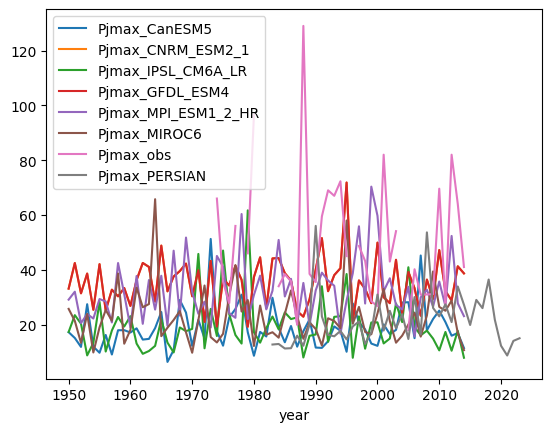

In [6]:
Hennaya_data.plot()

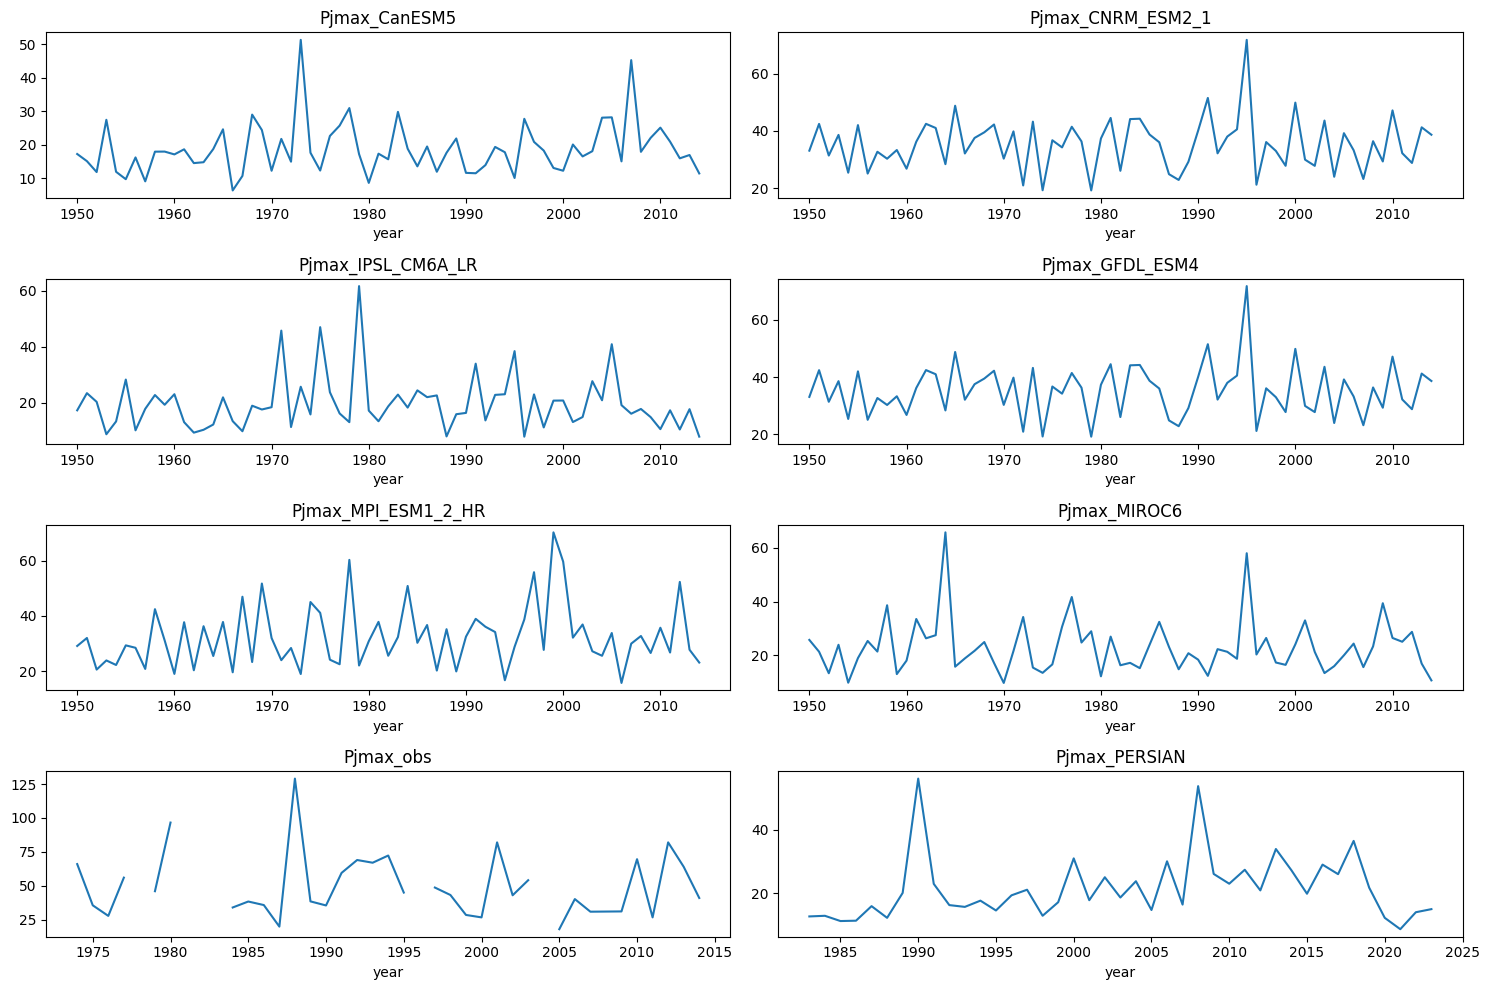

In [7]:
import matplotlib.pyplot as plt

# Assuming Hennaya_data is a DataFrame with 8 columns
# You can adjust the number of rows and columns based on your data
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, col in enumerate(Hennaya_data.columns):
    row_idx = i // num_cols  # Calculate row index
    col_idx = i % num_cols   # Calculate column index
    Hennaya_data[col].plot(ax=axes[row_idx, col_idx], title=col)

plt.tight_layout()
plt.show()


### Creations des boites à moustache pour les series Pjmax et voire comment est l'allure 


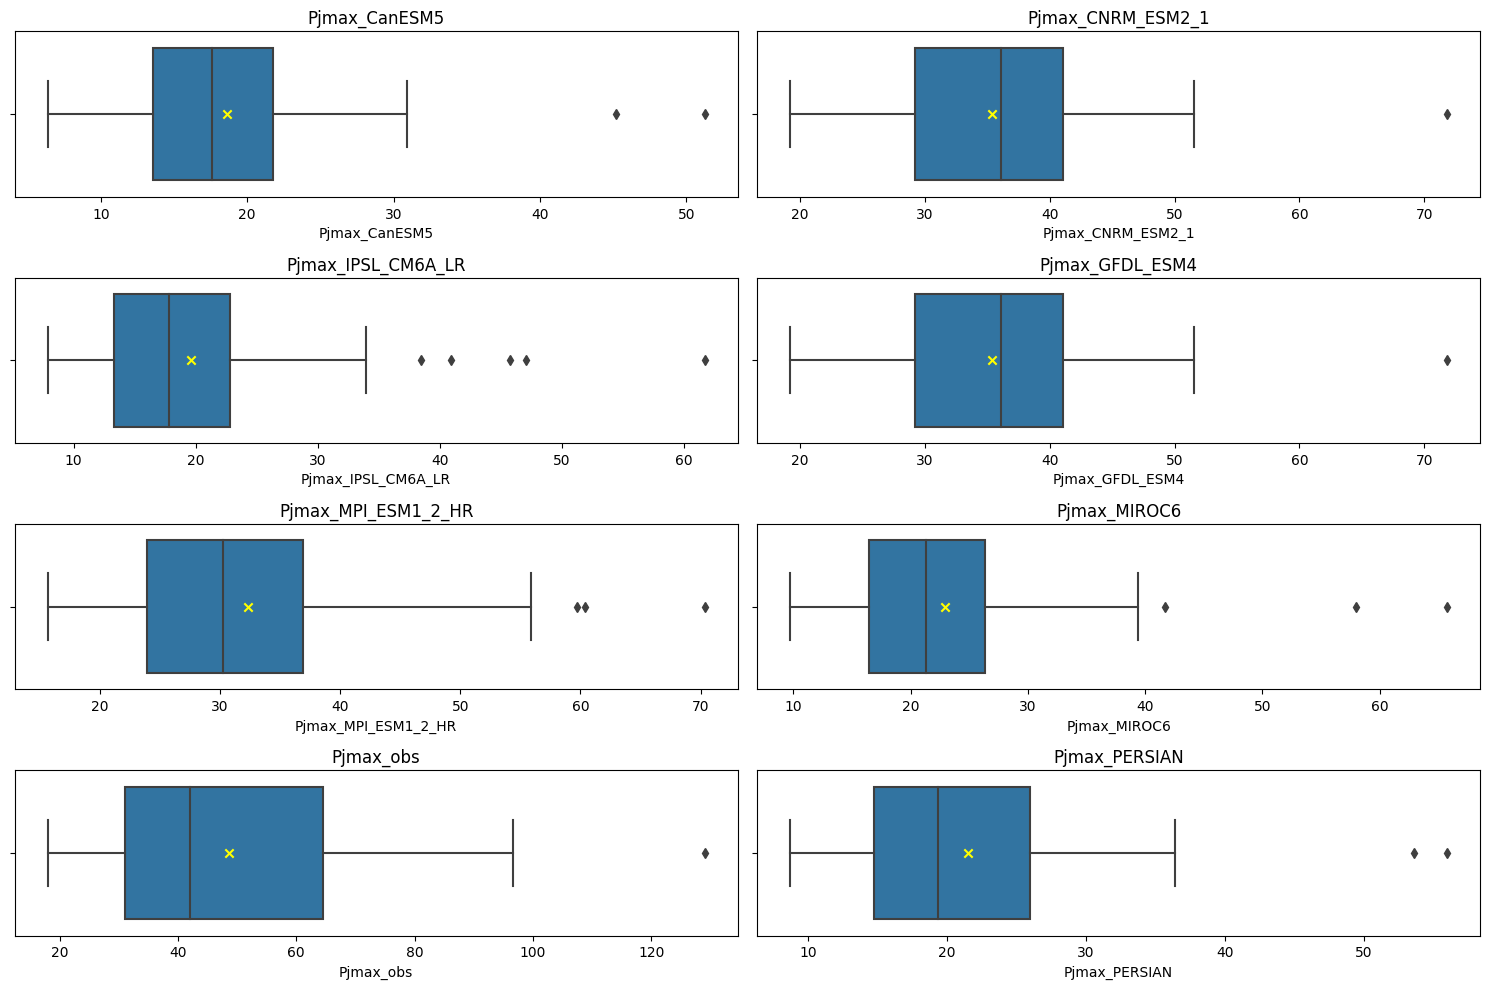

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Hennaya_data is a DataFrame with columns of interest
# You can adjust the number of rows and columns based on your data
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(Hennaya_data.columns):
    row_idx = i // num_cols  # Calculate row index
    col_idx = i % num_cols   # Calculate column index

    # Create a boxplot using Seaborn
    sns.boxplot(x=Hennaya_data[col], ax=axes[i])

    # Add a marker for the mean value
    mean_value = Hennaya_data[col].mean()
    axes[i].scatter(mean_value, 0 , marker ='x',color='yellow', label='Mean', zorder=3)  # zorder ensures that the marker is on top

    axes[i].set_title(col)

plt.tight_layout()
plt.show()


### Boxplots Avec la méme periode de temps de puis 1983 à 2014 

In [9]:
Pjmax_1983_2014=Hennaya_data
#voir l'indexation
Pjmax_1983_2014.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023],
      dtype='int64', name='year')

In [10]:
# Periode de temps d'interet
start_date = '1983'
end_date = '2014'

# Filter the DataFrame to include only the desired time span
Pjmax_1983_2014 = Pjmax_1983_2014.loc[(Pjmax_1983_2014.index >= 1983) & (Pjmax_1983_2014.index <= 2014)]

# Now, you can create boxplots or any other visualizations with the filtered_data
Pjmax_1983_2014.head(5)

,Pjmax_CanESM5,Pjmax_CNRM_ESM2_1,Pjmax_IPSL_CM6A_LR,Pjmax_GFDL_ESM4,Pjmax_MPI_ESM1_2_HR,Pjmax_MIROC6,Pjmax_obs,Pjmax_PERSIAN
year,,,,,,,,
1983,29.79,44.15,22.93,44.15,32.34,17.20,NaN,12.72
1984,18.81,44.28,18.28,44.28,50.89,15.22,34.0,12.92
1985,13.55,38.76,24.44,38.76,30.25,23.88,38.4,11.27
1986,19.47,36.05,22.01,36.05,36.70,32.45,35.8,11.38
1987,11.94,24.90,22.63,24.90,20.17,23.14,19.9,15.95


In [11]:
# Stats about data
Pjmax_1983_2014.describe()

,Pjmax_CanESM5,Pjmax_CNRM_ESM2_1,Pjmax_IPSL_CM6A_LR,Pjmax_GFDL_ESM4,Pjmax_MPI_ESM1_2_HR,Pjmax_MIROC6,Pjmax_obs,Pjmax_PERSIAN
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,29.000000,32.000000
mean,19.083750,36.177188,19.238437,36.177188,34.090313,22.415000,48.434483,21.875937
std,7.147947,10.333920,7.996938,10.333920,12.277286,9.048646,23.790128,10.527639
min,10.080000,21.220000,7.880000,21.220000,15.680000,10.670000,18.000000,11.270000
25%,13.827500,29.127500,14.585000,29.127500,27.065000,16.802500,31.100000,15.475000
50%,17.975000,36.085000,18.035000,36.085000,32.410000,21.020000,41.000000,19.005000
75%,21.147500,40.745000,22.847500,40.745000,36.750000,24.532500,64.000000,25.290000
max,45.210000,71.840000,40.920000,71.840000,70.340000,57.990000,129.000000,56.020000


<Axes: xlabel='year'>

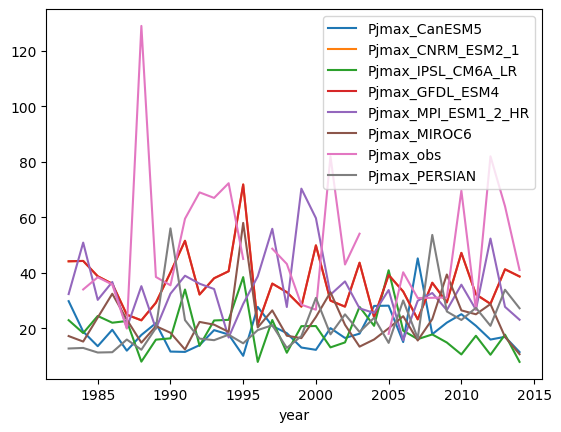

In [12]:
Pjmax_1983_2014.plot()

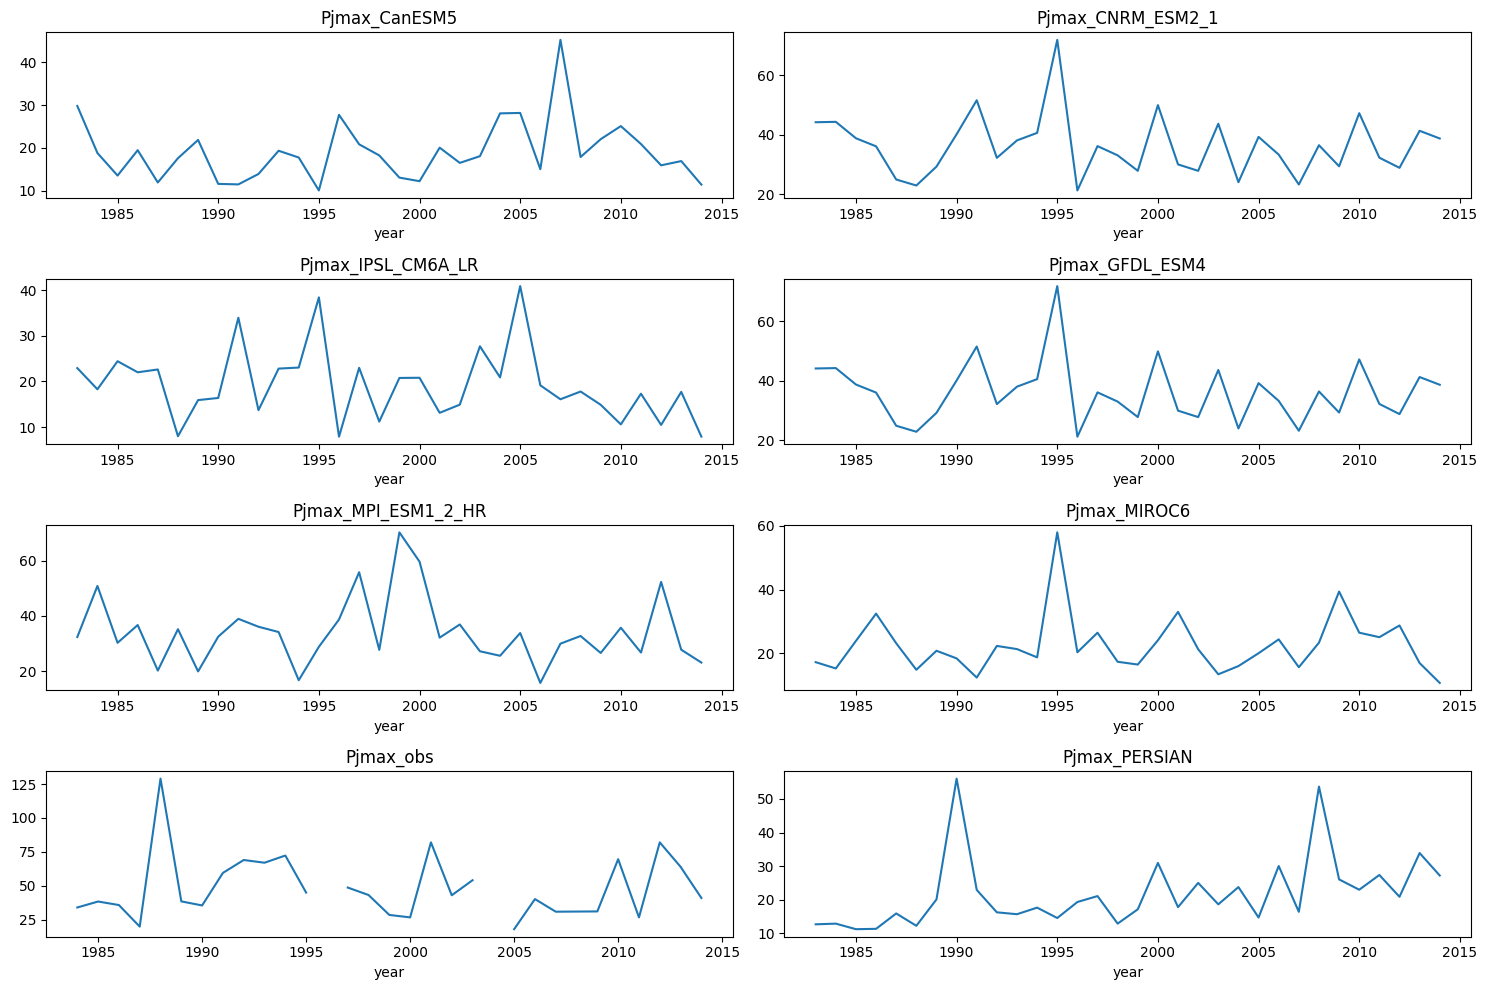

In [13]:
import matplotlib.pyplot as plt

# Assuming Hennaya_data is a DataFrame with 8 columns
# You can adjust the number of rows and columns based on your data
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, col in enumerate(Pjmax_1983_2014.columns):
    row_idx = i // num_cols  # Calculate row index
    col_idx = i % num_cols   # Calculate column index
    Pjmax_1983_2014[col].plot(ax=axes[row_idx, col_idx], title=col)

plt.tight_layout()
plt.show()

#### Refaire les bocplot avec la periode de 1983 à 2014

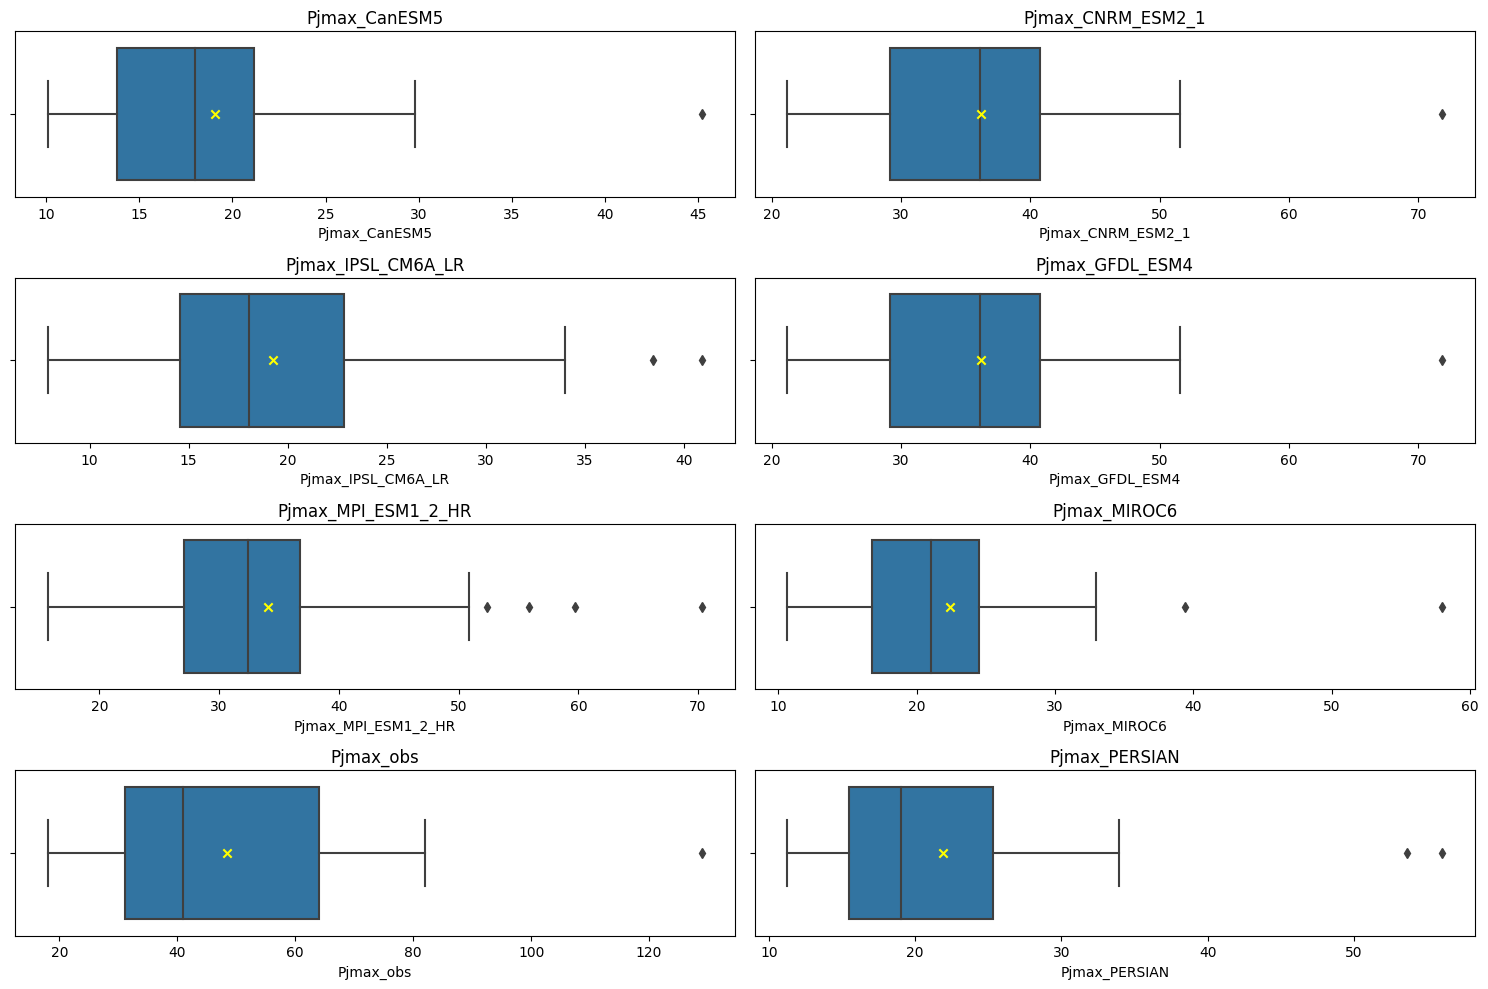

In [14]:
# Assuming Hennaya_data is a DataFrame with columns of interest
# You can adjust the number of rows and columns based on your data
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(Pjmax_1983_2014.columns):
    row_idx = i // num_cols  # Calculate row index
    col_idx = i % num_cols   # Calculate column index

    # Create a boxplot using Seaborn
    sns.boxplot(x=Pjmax_1983_2014[col], ax=axes[i])

    # Add a marker for the mean value
    mean_value = Pjmax_1983_2014[col].mean()
    axes[i].scatter(mean_value, 0 , marker ='x',color='yellow', label='Mean', zorder=3)  # zorder ensures that the marker is on top

    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [22]:
import plotly.subplots as sp
import plotly.graph_objs as go
import pandas as pd

# Assuming Pjmax_1983_2014 is a DataFrame with datetime index and 8 columns
# You can adjust the number of rows and columns based on your data
num_rows = 4
num_cols = 2

# Create a figure with subplots
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=Pjmax_1983_2014.columns, shared_xaxes=True)

# Flatten the subplot matrix
row_idx, col_idx = 1, 1

for col in Pjmax_1983_2014.columns:
    # Add a trace for each subplot
    fig.add_trace(go.Scatter(x=Pjmax_1983_2014.index, y=Pjmax_1983_2014[col], mode='lines', name=col),
                  row=row_idx, col=col_idx)

    # Update indices for subplot
    col_idx += 1
    if col_idx > num_cols:
        col_idx = 1
        row_idx += 1

# Update layout for better appearance
fig.update_layout(height=600, width=900, title_text="Interactive Plot", showlegend=False)

# Show the interactive plot
fig.show()
